# Capstone Project- Battle of Neighbourhoods

# INTRODUCTION

Gurgaon is a city just southwest of New Delhi in northern India. It’s known as a financial and technology hub. 
The Kingdom of Dreams is a large complex for theatrical shows. Sheetala Mata Mandir is an orange-and-white-striped 
Hindu temple. The Vintage Camera Museum showcases cameras and prints spanning a century. West of the city, Sultanpur National Park is home to hundreds of bird species.
The official language of Gurgaon and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously growing because of the city’s important role in government and commercial business.
With it’s diverse culture , comes diverse food items. There are many restaurants in Gurgaon City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of Gurgaon City and find which place is good for people so that can eat their favourite food of particular cuisine. Target audience will be people who like to eat in restaurants.


In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
#! pip install geocoder
import geocoder

In [4]:

df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Gurgaon']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()
df_NDLS.shape

(1118, 21)

In [5]:

df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [6]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [7]:
df_Res.head()
df_Res.shape

(874, 8)

In [10]:
Gurgaon_Rest = folium.Map(location=[28.45, 77.03], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Gurgaon_Rest)  

Gurgaon_Rest

In [11]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16,2
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80,2
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887,0
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802,0
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4,1


### What places are have best restaurant in Gurgaon?

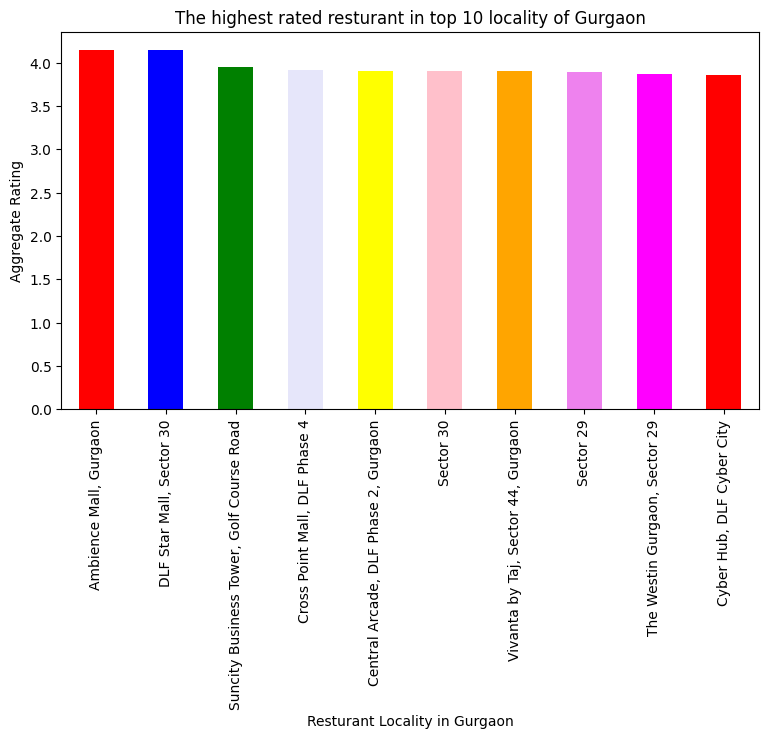

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar',color=['red','blue','green','lavender','yellow','pink','orange','violet','fuchsia'])


plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restraunts are available in Ambience Mall and DLF Star Mall,Sector 30.

### What places are have worst restaurants in Gurgaon?

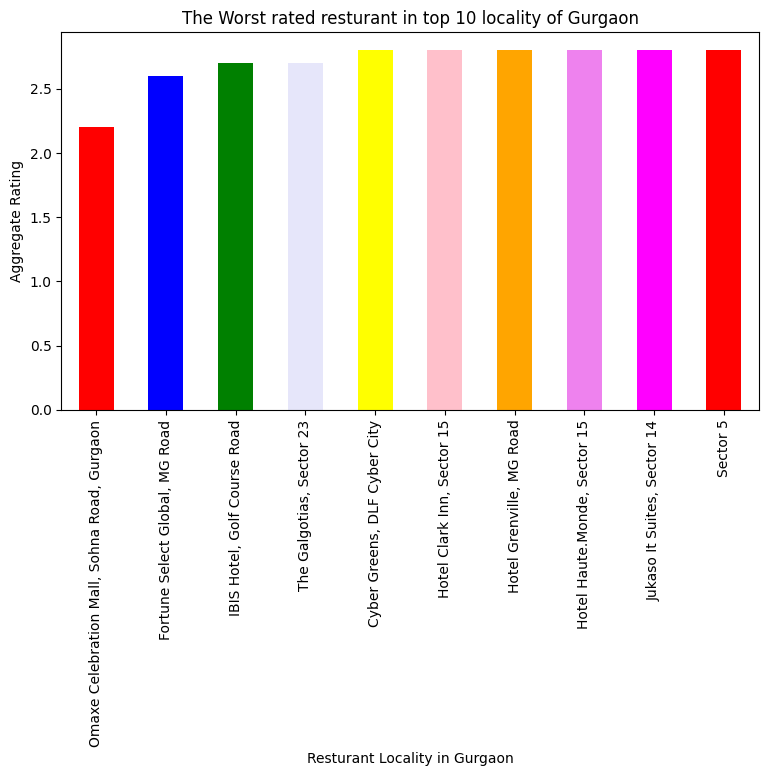

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar',color=['red','blue','green','lavender','yellow','pink','orange','violet','fuchsia'])


plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restraunts are in Omaxe Celebration Mall, Sohna Road.

### Which place are suitable for edible person in Gurgaon?

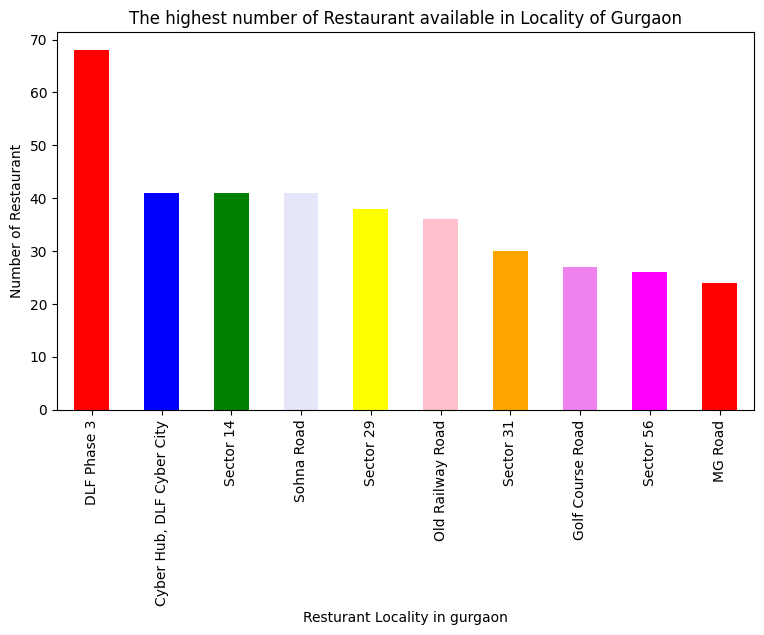

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Gurgaon')
#On x-axis
#my_colors = 'rgb'
#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot.bar(color=['red','blue','green','lavender','yellow','pink','orange','violet','fuchsia'])

plt.xlabel('Resturant Locality in gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

DLF Phase3 is the best place for edible person to stay.

### Which place are not suitable for edible person in Gurgaon?

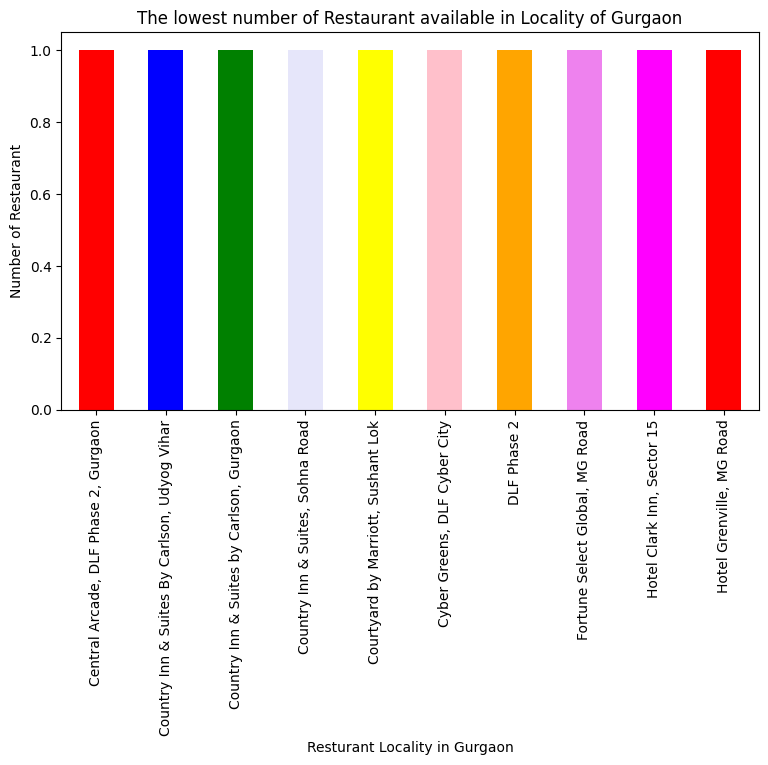

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar',color=['red','blue','green','lavender','yellow','pink','orange','violet','fuchsia'])


plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

### What are the best places for chinese restaurant in Gurgaon?

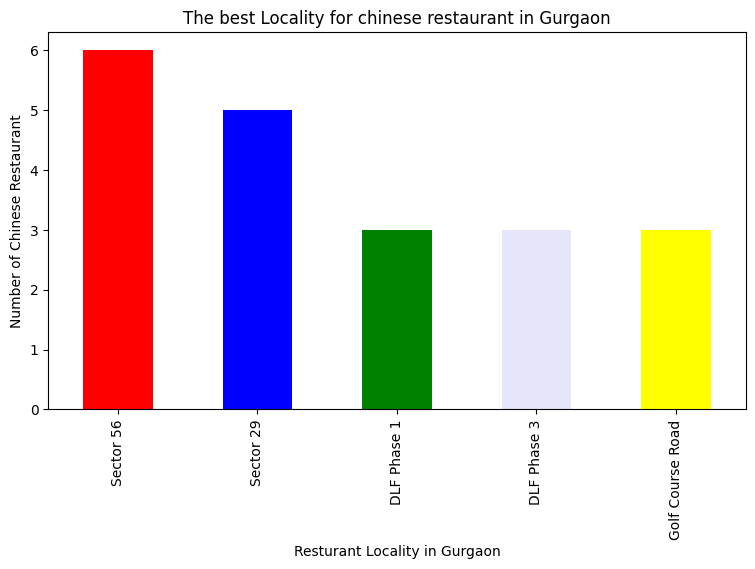

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar',color=['red','blue','green','lavender','yellow','pink','orange','violet','fuchsia'])


plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

Sector56 is best place for Chinese restraunt. 

### Which places are the best chinese resturants in Gurgaon?

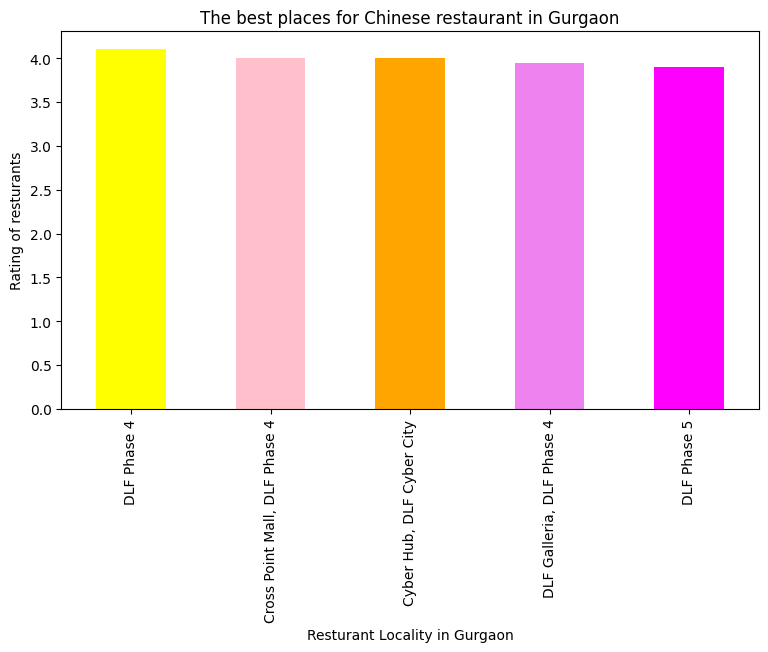

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar',color=['yellow','pink','orange','violet','fuchsia'])


plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

DLF Phase4 is best chinese restraunt.

## Data transformation

### Based on Locality grouping the data

In [18]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [19]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28


In [20]:
df_final.shape

(110, 8)

## Define Foursquare Credentials and Version

In [21]:
## Define Foursquare Credentials and Version
CLIENT_ID = '4V0DSX3TIHPKF51ZZULBHLSBBESLOAFYQIXQSXIE2RVQFQ1V' # Foursquare ID
CLIENT_SECRET = 'GA2HZYC2QJ0SVES5TLBOKESMKN2B0YJIML1FLUNZ1JGGKVYB' # Foursquare Secret
VERSION = '20190425' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4V0DSX3TIHPKF51ZZULBHLSBBESLOAFYQIXQSXIE2RVQFQ1V
CLIENT_SECRET:GA2HZYC2QJ0SVES5TLBOKESMKN2B0YJIML1FLUNZ1JGGKVYB


### create a function to repeat the same process to all the Locality in Gurgaon

In [22]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all Gurgaon Locality

In [23]:
# find the venues in all Gurgaon Locality
gurgaon_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

In [24]:
gurgaon_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [25]:
gurgaon_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",10,10,10,10,10,10
"Ambience Mall, Gurgaon",40,40,40,40,40,40
"Ansal Plaza Mall, Palam Vihar",5,5,5,5,5,5
Ardee City,5,5,5,5,5,5
"Best Western Skycity Hotel, Sector 15, Gurgaon",4,4,4,4,4,4
...,...,...,...,...,...,...
"Unitech Infospace, Sector 21, Gurgaon",8,8,8,8,8,8
"Vivanta by Taj, Sector 44, Gurgaon",15,15,15,15,15,15
"Vyapar Kendra, Palam Vihar",4,4,4,4,4,4


In [26]:
print('There are {} uniques categories.'.format(len(gurgaon_venues['Venue Category'].unique())))

There are 132 uniques categories.


In [28]:
## Analyze Each Locality

# one hot encoding
gurgaon_onehot = pd.get_dummies(gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
gurgaon_onehot['Locality'] = gurgaon_venues['Locality'] 

# move Locality column to the first column
column_list = gurgaon_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
gurgaon_onehot = gurgaon_onehot[column_list]

gurgaon_onehot.head()

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,...,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
gurgaon_grouped = gurgaon_onehot.groupby('Locality').mean().reset_index()
gurgaon_grouped

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,...,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,"ILD Trade Centre Mall, Sohna Road",0.00,0.000,0.000000,0.000,0.0,0.1,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,"Ambience Mall, Gurgaon",0.05,0.025,0.000000,0.025,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,"Ansal Plaza Mall, Palam Vihar",0.00,0.000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,Ardee City,0.00,0.000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.200000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",0.00,0.000,0.000000,0.250,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,"Unitech Infospace, Sector 21, Gurgaon",0.00,0.000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
105,"Vivanta by Taj, Sector 44, Gurgaon",0.00,0.000,0.066667,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.066667,0.0,0.0,0.066667,0.0,0.0,0.0,0.066667
106,"Vyapar Kendra, Palam Vihar",0.00,0.000,0.000000,0.250,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
107,"Vyapar Kendra, Sushant Lok",0.00,0.000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [32]:
gurgaon_grouped.shape

(109, 133)

In [33]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in gurgaon_grouped['Locality']:
    print("----"+hood+"----")
    temp = gurgaon_grouped[gurgaon_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
                  venue  freq
0         Shopping Mall   0.2
1               Brewery   0.2
2  Fast Food Restaurant   0.1
3      Department Store   0.1
4   Sporting Goods Shop   0.1


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.15
1                  Café  0.08
2  Fast Food Restaurant  0.08
3   American Restaurant  0.05
4    Italian Restaurant  0.05


----Ansal Plaza Mall, Palam Vihar----
            venue  freq
0     Pizza Place   0.2
1            Café   0.2
2            Food   0.2
3             Gym   0.2
4  Sandwich Place   0.2


----Ardee City----
                 venue  freq
0    Indian Restaurant   0.6
1      Thai Restaurant   0.2
2          Beer Garden   0.2
3  American Restaurant   0.0
4            Nightclub   0.0


----Best Western Skycity Hotel, Sector 15, Gurgaon----
                 venue  freq
0                Hotel  0.75
1     Asian Restaurant  0.25
2  American Restaurant  0.00
3           

4                Bar  0.08


----Le Meridien Gurgaon, MG Road----
        venue  freq
0       Hotel  0.25
1      Buffet  0.12
2  Restaurant  0.12
3        Park  0.12
4       Trail  0.12


----Leisure Inn, Sector 14, Gurgaon----
                 venue  freq
0                Hotel  0.83
1    Indian Restaurant  0.17
2            Nightclub  0.00
3  Moroccan Restaurant  0.00
4        Movie Theater  0.00


----Lemon Tree Premier, Sector 29----
                venue  freq
0             Brewery  0.20
1   Indian Restaurant  0.12
2                Café  0.12
3               Hotel  0.07
4  Chinese Restaurant  0.07


----MG Road----
                venue  freq
0    Department Store  0.22
1   Indian Restaurant  0.17
2             Brewery  0.06
3                 Gym  0.06
4  Mexican Restaurant  0.06


----MGF Mega City Mall, MG Road----
                 venue  freq
0    Indian Restaurant  0.25
1     Department Store  0.12
2  American Restaurant  0.06
3        Metro Station  0.06
4                 Caf



----Sushant Lok----
               venue  freq
0              Hotel  0.21
1  Indian Restaurant  0.16
2               Café  0.16
3        Snack Place  0.05
4          Juice Bar  0.05


----Sushant Shopping Arcade, Sushant Lok, Gurgaon----
               venue  freq
0              Hotel  0.22
1               Café  0.17
2  Indian Restaurant  0.11
3        Snack Place  0.06
4          Juice Bar  0.06


----The Bristol Hotel, DLF Phase 1----
                  venue  freq
0           Coffee Shop  0.17
1     Indian Restaurant  0.11
2  Fast Food Restaurant  0.11
3   American Restaurant  0.06
4         Metro Station  0.06


----The Claremont, MG Road----
                 venue  freq
0  Japanese Restaurant  0.18
1        Shopping Mall  0.18
2            Hotel Bar  0.09
3     Asian Restaurant  0.09
4                Hotel  0.09


----The Galgotias, Sector 23----
               venue  freq
0               Café  0.25
1              Hotel  0.12
2  Indian Restaurant  0.12
3        Pizza Place  0.12


In [34]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = gurgaon_grouped['Locality']

for ind in np.arange(gurgaon_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gurgaon_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Shopping Mall,Brewery,Department Store,Fast Food Restaurant,BBQ Joint,Sporting Goods Shop,Indian Restaurant,Movie Theater,Electronics Store,Food
1,"Ambience Mall, Gurgaon",Indian Restaurant,Fast Food Restaurant,Café,American Restaurant,Clothing Store,Shopping Mall,Italian Restaurant,Restaurant,Multiplex,Bar
2,"Ansal Plaza Mall, Palam Vihar",Pizza Place,Food,Sandwich Place,Café,Gym,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
3,Ardee City,Indian Restaurant,Beer Garden,Thai Restaurant,Yoga Studio,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Asian Restaurant,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
...,...,...,...,...,...,...,...,...,...,...,...
104,"Unitech Infospace, Sector 21, Gurgaon",Pizza Place,Tea Room,Thai Restaurant,Sandwich Place,Donut Shop,Indian Restaurant,Fast Food Restaurant,Department Store,Deli / Bodega,Flea Market
105,"Vivanta by Taj, Sector 44, Gurgaon",Fast Food Restaurant,Yoga Studio,Snack Place,Art Gallery,Chinese Restaurant,Coffee Shop,Donut Shop,Falafel Restaurant,Pizza Place,Resort
106,"Vyapar Kendra, Palam Vihar",Café,Asian Restaurant,Market,Shopping Mall,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Food Court
107,"Vyapar Kendra, Sushant Lok",Restaurant,Indian Restaurant,Hotel,Plaza,Food & Drink Shop,Lounge,Café,Juice Bar,Portuguese Restaurant,Sandwich Place


In [40]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Gurgaon_clustering = gurgaon_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Gurgaon_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(109,)

In [42]:
# add clustering labels
Gurgaon_merged = df_final.head(109)
Gurgaon_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
Gurgaon_merged = Gurgaon_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Gurgaon_merged.head()

<ipython-input-42-9d7998d37b91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gurgaon_merged['Cluster Labels'] = kmeans.labels_


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96,0,Shopping Mall,Brewery,Department Store,Fast Food Restaurant,BBQ Joint,Sporting Goods Shop,Indian Restaurant,Movie Theater,Electronics Store,Food
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689,3,Indian Restaurant,Fast Food Restaurant,Café,American Restaurant,Clothing Store,Shopping Mall,Italian Restaurant,Restaurant,Multiplex,Bar
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19,2,Pizza Place,Food,Sandwich Place,Café,Gym,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65,1,Indian Restaurant,Beer Garden,Thai Restaurant,Yoga Studio,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28,4,Hotel,Asian Restaurant,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop


In [46]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Gurgaon_merged['Lat'], Gurgaon_merged['Lng'], Gurgaon_merged['Locality'], Gurgaon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:
## Examine Clusters

## Cluster 1
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 0, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.424872,3.050000,Average,96,0,Shopping Mall,Brewery,Department Store,Fast Food Restaurant,BBQ Joint,Sporting Goods Shop,Indian Restaurant,Movie Theater,Electronics Store,Food
23,28.448633,3.675000,"Average, Good",214,0,Hotel,Shopping Mall,Italian Restaurant,Japanese Restaurant,Food & Drink Shop,Lounge,Dumpling Restaurant,Nightclub,Coffee Shop,Gourmet Shop
24,28.447905,3.706667,"Average, Good, Very Good",2920,0,Hotel,Shopping Mall,Italian Restaurant,Japanese Restaurant,Food & Drink Shop,Lounge,Falafel Restaurant,Dumpling Restaurant,Nightclub,Gourmet Shop
28,28.422147,3.500000,"Average, Good",110,0,Gym / Fitness Center,Hotel,Cable Car,Moroccan Restaurant,Gift Shop,Asian Restaurant,Hotel Bar,Department Store,Dessert Shop,Dim Sum Restaurant
31,28.460392,3.642857,"Average, Excellent, Good, Very Good",2637,0,Pub,Gym,Indian Restaurant,Brewery,Shopping Mall,French Restaurant,Korean Restaurant,Japanese Restaurant,Golf Course,Diner
33,28.421012,3.000000,Average,333,0,Shopping Mall,Pizza Place,Bakery,Dessert Shop,Convenience Store,Café,Sandwich Place,Gym / Fitness Center,Bagel Shop,Food Court
39,28.447023,2.700000,Average,96,0,Falafel Restaurant,Chinese Restaurant,Café,Hotel,Shopping Mall,Gourmet Shop,Ice Cream Shop,Japanese Restaurant,Dumpling Restaurant,Nightclub
55,28.451076,3.562500,"Average, Good",361,0,Brewery,Café,Gym / Fitness Center,Food & Drink Shop,Bakery,Shopping Mall,Bistro,Pizza Place,Italian Restaurant,Resort
56,28.507214,3.020000,Average,177,0,Market,Fast Food Restaurant,Café,Shopping Mall,Yoga Studio,Electronics Store,Food,Flea Market,Falafel Restaurant,Donut Shop
59,28.477707,3.000000,Average,21,0,Japanese Restaurant,Shopping Mall,Hotel,Fast Food Restaurant,Garden Center,Café,Italian Restaurant,Asian Restaurant,Hotel Bar,Diner


In [48]:
## Examine Clusters

## Cluster 2
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 1, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,28.441660,3.000000,Average,65,1,Indian Restaurant,Beer Garden,Thai Restaurant,Yoga Studio,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store
66,28.474253,2.997561,"Average, Good, Poor",951,1,Indian Restaurant,Pizza Place,Dessert Shop,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Diner
100,28.239367,3.550000,"Average, Good",67,1,Indian Restaurant,Yoga Studio,Donut Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Diner


In [49]:
## Examine Clusters

## Cluster 3
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 2, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.511460,3.000000,Average,19,2,Pizza Place,Food,Sandwich Place,Café,Gym,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
69,28.509732,3.175000,"Average, Good",95,2,Pizza Place,Tea Room,Thai Restaurant,Sandwich Place,Donut Shop,Indian Restaurant,Fast Food Restaurant,Department Store,Deli / Bodega,Flea Market
82,28.425752,3.000000,Average,118,2,Pizza Place,Lounge,Dessert Shop,Tennis Court,Donut Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dumpling Restaurant
103,28.503476,3.023077,Average,153,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,28.443251,3.433333,"Average, Good",660,2,Pizza Place,Coffee Shop,Café,Tea Room,Food Stand,Food,Donut Shop,Dessert Shop,Park,Hotel
108,28.460269,3.133333,"Average, Good, Poor",1484,2,Restaurant,Indian Restaurant,Hotel,Plaza,Food & Drink Shop,Lounge,Café,Juice Bar,Portuguese Restaurant,Sandwich Place


In [50]:
## Examine Clusters

## Cluster 4
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 3, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.502845,4.150000,Very Good,2689,3,Indian Restaurant,Fast Food Restaurant,Café,American Restaurant,Clothing Store,Shopping Mall,Italian Restaurant,Restaurant,Multiplex,Bar
5,28.480759,3.900000,Good,415,3,Department Store,Indian Restaurant,Shopping Mall,American Restaurant,Mexican Restaurant,Fast Food Restaurant,Donut Shop,Coffee Shop,Pizza Place,Café
6,28.443040,3.500000,"Average, Good, Very Good",1214,3,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Hotel,Sandwich Place,Café,Diner,Ice Cream Shop,Dim Sum Restaurant,Dessert Shop
7,28.509225,3.500000,Good,32,3,Clothing Store,Hotel,Fast Food Restaurant,Campground,Dumpling Restaurant,Food,Flea Market,Falafel Restaurant,Electronics Store,Diner
11,28.460925,3.200000,Average,6,3,Hotel,Indian Restaurant,Sandwich Place,Hotel Bar,Juice Bar,Diner,Dessert Shop,Chinese Restaurant,Café,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,28.502287,3.200000,Average,17,3,Hotel,Restaurant,Bar,Indian Restaurant,French Restaurant,Lounge,Nightlife Spot,Pool,Sandwich Place,Seafood Restaurant
97,28.464600,3.600000,Good,94,3,Hotel,Indian Restaurant,Brewery,Chinese Restaurant,Japanese Restaurant,Café,Bar,Korean Restaurant,Fast Food Restaurant,Diner
101,28.502287,3.400000,"Average, Good",63,3,Hotel,Restaurant,Bar,Indian Restaurant,French Restaurant,Lounge,Nightlife Spot,Pool,Sandwich Place,Seafood Restaurant
105,28.509809,3.218182,"Average, Good, Poor",970,3,Pizza Place,Tea Room,Thai Restaurant,Sandwich Place,Donut Shop,Indian Restaurant,Fast Food Restaurant,Department Store,Deli / Bodega,Flea Market


In [51]:
## Examine Clusters

## Cluster 5
Gurgaon_merged.loc[Gurgaon_merged['Cluster Labels'] == 4, Gurgaon_merged.columns[[1] + list(range(5, Gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.85,Average,28,4,Hotel,Asian Restaurant,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
8,28.461988,3.80,Good,91,4,Hotel,Japanese Restaurant,Go Kart Track,Indian Restaurant,Café,Resort,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
9,28.468385,3.25,"Average, Good",44,4,Hotel,Indian Restaurant,Wine Bar,Art Gallery,Asian Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
10,28.334942,3.40,Average,19,4,Hotel,Food Court,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant
34,28.457610,2.80,Average,7,4,Hotel,Asian Restaurant,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
35,28.465600,2.80,Average,15,4,Hotel,Bed & Breakfast,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Food Stand
45,28.470510,3.00,Average,35,4,Hotel,Indian Restaurant,Donut Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Diner
57,28.459079,3.20,Average,13,4,Hotel,Market,Dessert Shop,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
62,28.449740,3.50,Good,194,4,Hotel,Gym,Snack Place,Gym / Fitness Center,Gourmet Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
67,28.457396,2.96,Average,99,4,Hotel,Department Store,Asian Restaurant,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Donut Shop


In [52]:
pip install pandoc


  Created wheel for pandoc: filename=pandoc-1.0.2-py3-none-any.whl size=19996 sha256=70e7d6311492e284328ae4f31181362be260fa8576825e11801dcda17cbdcb8a
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\ab\3a\6c\4e657b8601b8e21b8685e467f6a35aff3d77e6d63652c8ce07
Successfully built pandoc


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


# RESULT

●	Sector56 has the best Chinese Restaurant.
●	DLF Phase3 is the best place for edible person.
●	The worst restaurants is in Omaxe Celebration Mall, Sohna Road.
●	Ambience Mall and DLF Star Mall, Sector30 have best restaurants.
